In [1]:
import numpy as np

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import subprocess
from tqdm import tqdm

In [4]:
sb.set()
plt.rcParams['figure.figsize'] = [3, 2]
plt.rcParams['figure.dpi'] = 144
plt.rcParams['axes.unicode_minus'] = False
sb.set_style("ticks")

In [5]:
cmd1 = "gcc main.c -o a.o"
cmd2 = "./a.o"
cmd3 = "rm a.o"

In [6]:
subprocess.call(cmd1, shell=True)

0

In [7]:
def run_test(cmd, size, method):
    res = {}
    for mth in method:
        res[mth] = {"size":[], "ticks":[]}
        for sz in tqdm(size):
            cmd_s = cmd + " " + str(sz) + " " + str(mth)
            tmp = 0
            for _ in range(20):
                tmp += int(subprocess.check_output(cmd_s.split(" ")).decode("utf-8"))
            res[mth]["size"].append(sz)
            res[mth]["ticks"].append(tmp / 20)
        res[mth]["size"] = np.array(res[mth]["size"])
        res[mth]["ticks"] = np.array(res[mth]["ticks"])
    return res

In [13]:
res = run_test(cmd2, np.arange(100, 4100, 25), [4])

100%|██████████| 160/160 [00:14<00:00, 11.40it/s]


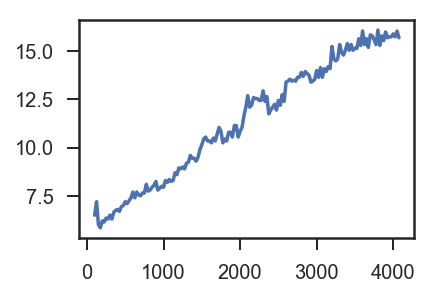

In [14]:
plt.plot(res[4]["size"], res[4]["ticks"])